In [1]:
import pandas as pd

#데이터 로드
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

In [9]:
train_df.head()

,가격,년식,종류,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
0,1885,2015,준중형,11.8,172,21.0,가솔린,0,1999,1300,자동
1,2190,2015,준중형,12.3,204,27.0,가솔린,0,1591,1300,자동
2,1135,2015,소형,15.0,100,13.6,가솔린,0,1368,1035,수동
3,1645,2014,소형,14.0,140,17.0,가솔린,0,1591,1090,자동
4,1960,2015,대형,9.6,175,46.0,디젤,0,2497,1990,자동


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   가격      71 non-null     int64  
 1   년식      71 non-null     int64  
 2   종류      71 non-null     object 
 3   연비      71 non-null     float64
 4   마력      71 non-null     int64  
 5   토크      71 non-null     float64
 6   연료      71 non-null     object 
 7   하이브리드   71 non-null     int64  
 8   배기량     71 non-null     int64  
 9   중량      71 non-null     int64  
 10  변속기     71 non-null     object 
dtypes: float64(2), int64(6), object(3)
memory usage: 6.2+ KB


In [2]:
test_df.head()

,가격,년식,종류,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
0,1915,2015,대형,6.8,159,23.0,LPG,0,2359,1935,수동
1,1164,2012,소형,13.3,108,13.9,가솔린,0,1396,1035,자동
2,2817,2015,중형,14.4,184,41.0,디젤,0,1995,1792,자동
3,2160,2015,대형,10.9,175,46.0,디젤,0,2497,2210,수동
4,1915,2015,대형,6.4,159,23.0,LPG,0,2359,1935,자동


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   가격      31 non-null     int64  
 1   년식      31 non-null     int64  
 2   종류      31 non-null     object 
 3   연비      31 non-null     float64
 4   마력      31 non-null     int64  
 5   토크      31 non-null     float64
 6   연료      31 non-null     object 
 7   하이브리드   31 non-null     int64  
 8   배기량     31 non-null     int64  
 9   중량      31 non-null     int64  
 10  변속기     31 non-null     object 
dtypes: float64(2), int64(6), object(3)
memory usage: 2.8+ KB


## EDA

In [15]:
import pandas as pd
import sweetviz as sv

# 경고메세지 끄기
import warnings
warnings.filterwarnings(action='ignore')
sv.config_parser.read_string("[General]\nuse_cjk_font=1")

df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

compare_report = sv.compare([df_train,'Train'],[df_test,'Test'],target_feat='가격')
compare_report.show_html(r'./image/EDA_Report.html')

Feature: 가격 (TARGET)                         |▊         | [  8%]   00:00 -> (00:00 left)

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)  


Report ./image/EDA_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [17]:
import pandas as pd
# from sklearn.preprocessing import OneHotEncoder

# 1. 결측치 측정
train_missing = df_train['가격'].isnull().sum()
test_missing = df_test['가격'].isnull().sum()
print(f"Train 데이터 '가격' 열의 결측치 개수: {train_missing}")
print(f"Test 데이터 '가격' 열의 결측치 개수: {test_missing}")

# 2. 중복값 측정
train_duplicates = df_train.duplicated().sum()
test_duplicates = df_test.duplicated().sum()
print(f"Train 데이터의 중복된 행 개수: {train_duplicates}")
print(f"Test 데이터의 중복된 행 개수: {test_duplicates}")

# 3. 이상치 측정 (IQR 방법 사용)
Q1_train = df_train['가격'].quantile(0.25)
Q3_train = df_train['가격'].quantile(0.75)
IQR_train = Q3_train - Q1_train
train_outliers = df_train[((df_train['가격'] < (Q1_train - 1.5 * IQR_train)) | (df_train['가격'] > (Q3_train + 1.5 * IQR_train)))].shape[0]

Q1_test = df_test['가격'].quantile(0.25)
Q3_test = df_test['가격'].quantile(0.75)
IQR_test = Q3_test - Q1_test
test_outliers = df_test[((df_test['가격'] < (Q1_test - 1.5 * IQR_test)) | (df_test['가격'] > (Q3_test + 1.5 * IQR_test)))].shape[0]

print(f"Train 데이터 '가격' 열의 이상치 개수: {train_outliers}")
print(f"Test 데이터 '가격' 열의 이상치 개수: {test_outliers}")
# 이 코드를 실행하면 각 데이터셋의 '가격' 열에 대한 결측치, 중복값, 이상치의 개수를 출력합니다.


# encoder = OneHotEncoder(sparse=False)

# # Train 데이터에 대한 인코딩
# encoded_train = encoder.fit_transform(df_train[['년식', '종류', '연료', '변속기']])
# encoded_train_df = pd.DataFrame(encoded_train, columns=encoder.get_feature_names(['년식', '종류', '연료', '변속기']))
# df_train = pd.concat([df_train, encoded_train_df], axis=1)
# df_train.drop(['년식', '종류', '연료', '변속기'], axis=1, inplace=True)

# # Test 데이터에 대한 인코딩
# encoded_test = encoder.transform(df_test[['년식', '종류', '연료', '변속기']])
# encoded_test_df = pd.DataFrame(encoded_test, columns=encoder.get_feature_names(['년식', '종류', '연료', '변속기']))
# df_test = pd.concat([df_test, encoded_test_df], axis=1)
# df_test.drop(['년식', '종류', '연비', '변속기', '하이브리드'], axis=1, inplace=True)





Train 데이터 '가격' 열의 결측치 개수: 0
Test 데이터 '가격' 열의 결측치 개수: 0
Train 데이터의 중복된 행 개수: 1
Test 데이터의 중복된 행 개수: 0
Train 데이터 '가격' 열의 이상치 개수: 3
Test 데이터 '가격' 열의 이상치 개수: 4


In [7]:
# 종류와 년식이 가격에 가장 크게 영향을 끼치며, 대형차일수록 & 2015년형일수록 가격이 높다. 3번째로는 변속기의 자동 or 수동 여부가 영향을 끼치는데 자동이 수동보다 1000만원 가량 비싸다.
# 그 이유로는 최신 연식일수록 자동 비율이 높기 때문이며, 결과적으로 마력&토크&배기량등의 수치에서도 자동이 수동보다 성능이 높은 것을 확인 할 수 있었다.

```
1.결측치:  0
2.중복값:  train:1, test:0
3.이상치:  train:3, test:4 => 가격은 적은 수이므로 잠정적으로 수용하는 것으로 판단한다
4.인코딩:  '년식'(숫자이긴 하나 범주로 결정함/ 1.###.선형회귀모델에서 error 발생해서 뺌), '종류', '연료', '변속기' 인코딩 결정
5.피처&레이블 관계성 유무: (heatmap 분석해보니)관계성이 있음 => 학습은 가능할 듯
6.스케일링: 
```

In [24]:
# 가공: 중복값 처리
train_df[train_df.duplicated()]

,가격,년식,종류,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
16,1960,2015,대형,11.4,175,46.0,디젤,0,2497,1990,수동


In [25]:
len(train_df) # 중복제거 전

71

In [27]:
train_df = train_df.drop_duplicates()
len(train_df) # 중복제거 후

70

In [34]:
# 1차 가공 후 데이터 저장, index=False를 통해 쓰레기 index 값 생성 방지
train_df.to_csv('./data/train_pre.csv',index=False)

In [35]:
pd.read_csv('./data/train_pre.csv')

,가격,년식,종류,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
0,1885,2015,준중형,11.8,172,21.0,가솔린,0,1999,1300,자동
1,2190,2015,준중형,12.3,204,27.0,가솔린,0,1591,1300,자동
2,1135,2015,소형,15.0,100,13.6,가솔린,0,1368,1035,수동
3,1645,2014,소형,14.0,140,17.0,가솔린,0,1591,1090,자동
4,1960,2015,대형,9.6,175,46.0,디젤,0,2497,1990,자동
...,...,...,...,...,...,...,...,...,...,...,...
65,3802,2015,중형,8.5,290,34.8,가솔린,0,3342,1901,자동
66,1270,2012,소형,13.3,108,13.9,가솔린,0,1396,1040,자동
67,2430,2015,준중형,12.8,186,41.0,디젤,0,1995,1665,자동
68,2870,2015,중형,17.7,156,19.3,가솔린,1,1999,1585,자동


<Axes: >

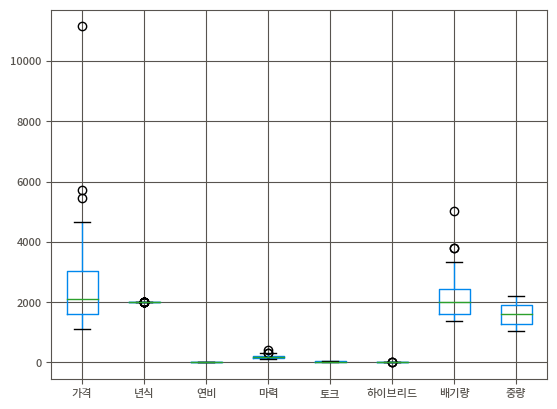

In [16]:
train_df.boxplot()

<Axes: >

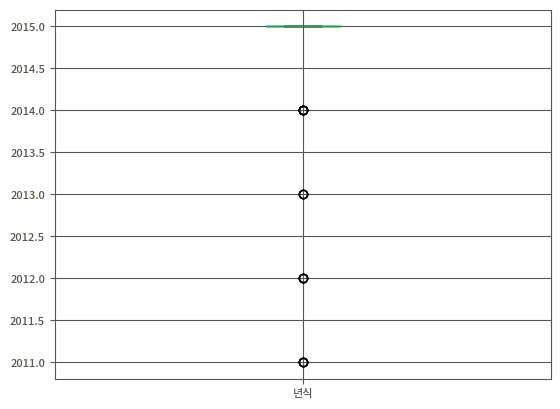

In [19]:
train_df[['년식']].boxplot() ## 이런 형태면 범주형_boxplot으로 분석하는 의미가 없음

<Axes: >

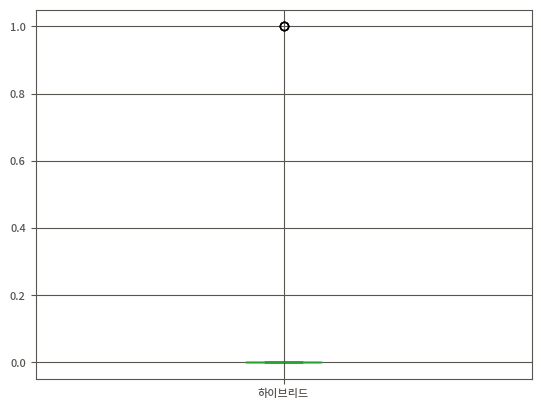

In [22]:
train_df[['하이브리드']].boxplot() ## 이런 형태면 범주형으로 설정하고 인코딩할 수 있지만, 나는 하이브리드가 71개 중 2개만 해당되며 가격에 영향을 끼치는 4순위라고 판단했기에 범주형으로 판단 x